# SIMPLE EXPONENTIAL SMOOTHING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import SimpleExpSmoothing

### LOAD DATA

In [2]:
df = pd.read_csv("female_births_california.csv", index_col="Date", parse_dates=True)
df = df.asfreq("d")
df

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


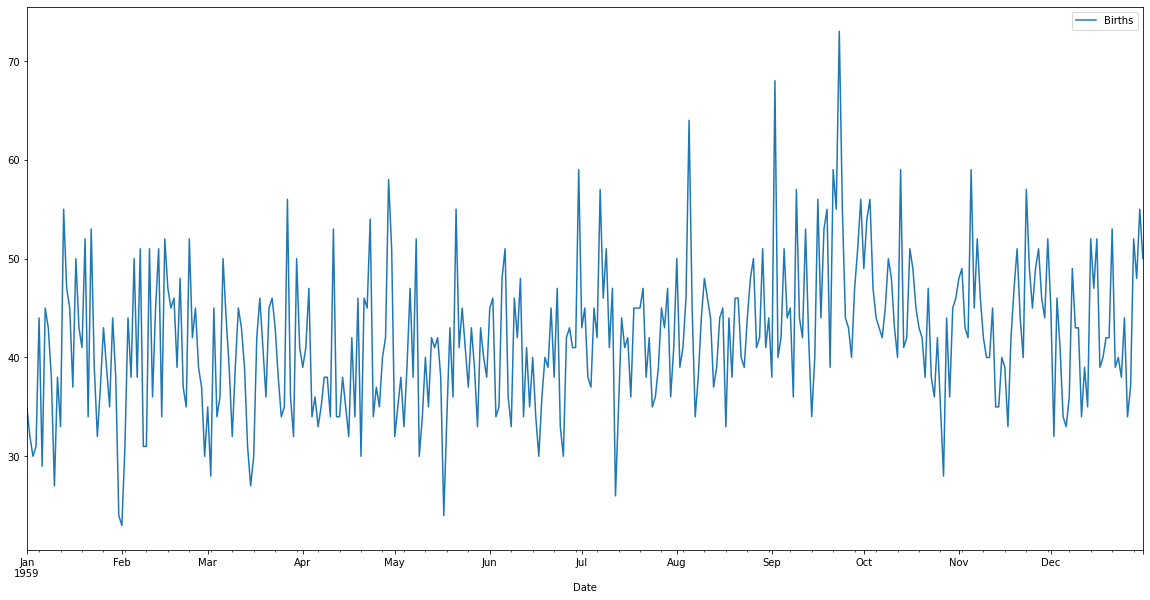

In [3]:
df.plot(figsize=(20, 10))

### SPLIT DATA

In [4]:
train, test = df.iloc[:-30], df.iloc[-30:]
train.shape, test.shape, train.index[-1], test.index[0]

((335, 1),
 (30, 1),
 Timestamp('1959-12-01 00:00:00', freq='D'),
 Timestamp('1959-12-02 00:00:00', freq='D'))

### MODEL

In [5]:
model = SimpleExpSmoothing(train["Births"])
res = model.fit()
res.summary()

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Dep. Variable:,Births,No. Observations:,335
Model:,SimpleExpSmoothing,SSE,16679.107
Optimized:,True,AIC,1313.107
Trend:,None,BIC,1320.735
Seasonal:,None,AICC,1313.228
Seasonal Periods:,None,Date:,"Sun, 31 Jan 2021"
Box-Cox:,False,Time:,20:46:21
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0500586,alpha,True
initial_level,38.730607,l.0,True


### EVALUATION

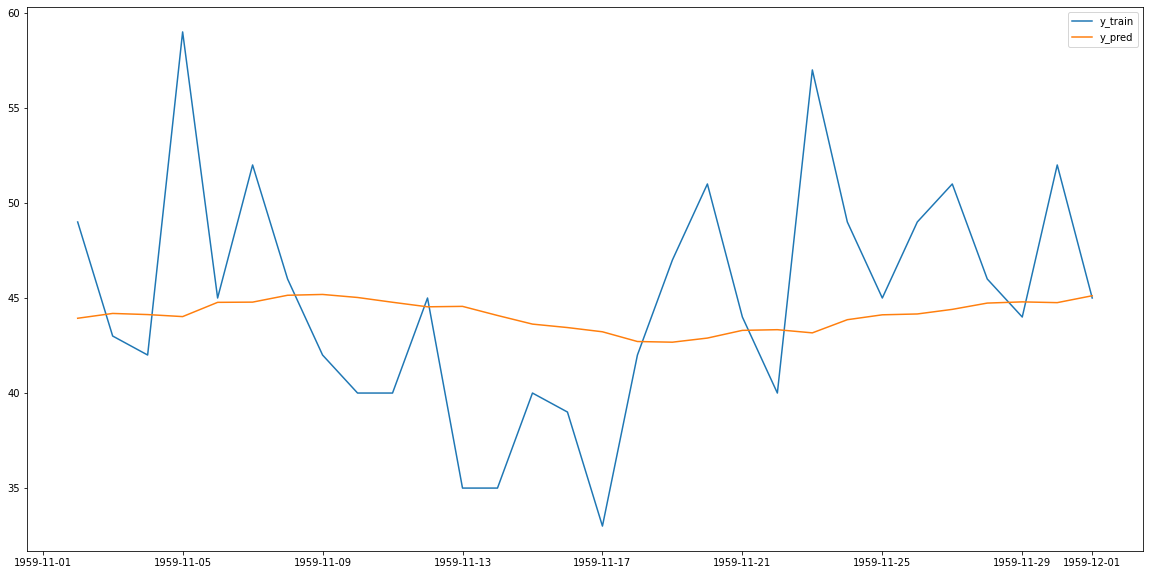

In [6]:
fig, ax = plt.subplots(1, figsize=(20, 10))

ax.plot(train.iloc[-30:], label="y_train")
ax.plot(res.fittedvalues.iloc[-30:], label="y_pred")
ax.legend()

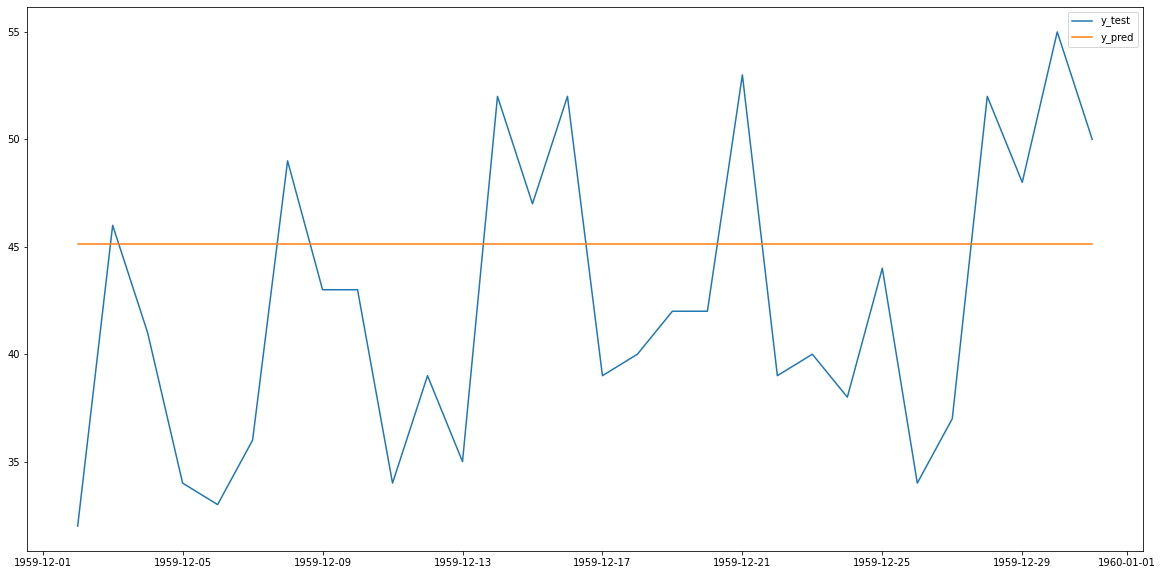

In [7]:
fig, ax = plt.subplots(1, figsize=(20, 10))

ax.plot(test, label="y_test")
ax.plot(res.forecast(30), label="y_pred")
ax.legend()